In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
data=pd.read_excel(r'C:\Users\aswan\OneDrive\Desktop\intership\iris_data.xls')

In [4]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
med=data.median()
df = data.fillna(med)

C:\Users\aswan\AppData\Local\Temp\ipykernel_19708\2366100806.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med=data.median()


<Axes: >

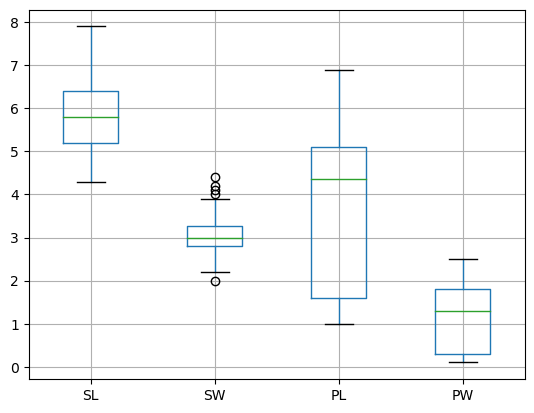

In [7]:
df.boxplot()

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [9]:
df['Classification']=label_encoder.fit_transform(df['Classification'])

In [10]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [11]:
c=sns.heatmap(data.corr(),annot=True)
c

C:\Users\aswan\AppData\Local\Temp\ipykernel_19708\2114475105.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c=sns.heatmap(data.corr(),annot=True)


<Axes: >

In [12]:
x=df.drop('Classification',axis=1)
y=df['Classification']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [14]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [15]:
model=lr.fit(X_train,y_train)

In [16]:
y_pred=model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
print('MSE is : \n',mean_squared_error(y_test,y_pred))

MSE is : 
 0.03674897628057208


In [18]:
from sklearn.metrics import r2_score
print('R squre value  is :\n',r2_score(y_test,y_pred))

R squre value  is :
 0.9474179989626155


In [23]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [24]:
y_pred=svmclf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is ',accuracy_score(y_test,y_pred))


Accuracy is  1.0


In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  1.0


In [26]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred=rf_clf.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [29]:
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  1.0


In [30]:
##hyper parameter tunug
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf1.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=20)

In [31]:
y_pred=rf_clf1.predict(X_test)
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  1.0


In [32]:
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=10,criterion='entropy',min_samples_split=2)
rf_clf1.fit(X_train,y_train)
y_pred=rf_clf1.predict(X_test)
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  1.0
